In [28]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [29]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [32]:
#generators --> divide whole data to small batches
#generators are used to process large amount of data
#We will make 2 geneartor .1 for training dataset and 1 for testing dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [33]:
#Normalize
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)
#Ye iss leiy kr rehy h ta k sarey values ko 0 and 1 k bech m krey.


In [34]:
#Create CNN Model
#three convolution layers
# in 1st layer, 32 filters
# in 2nd layer, 64 filters
# in 3rd layer, 128 filters
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3))) # 1st convolution layer
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid')) # 1st pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu')) # 2nd convolution layer
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid')) # 2nd pooling layer

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu')) # 3rd convolution layer
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid')) # 3rd pooling layer
# 2nd and 3rd Convolution layer m input_shape = (256,256,3) dyny ki zaurort nhi

model.add(Flatten()) #flatten layer
# 3 Fully Connected Layers lga rehy h
model.add(Dense(128,activation='relu'))  # 128  = neurons
model.add(Dense(64,activation = 'relu'))  # 64 neurons
model.add(Dense(1,activation = 'sigmoid'))  # output h so 1 neuron and activation "sigmoid" ho jaye ga.


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [36]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [37]:
from keras.utils.tf_utils import validate_axis
history = model.fit(train_dataset,epochs = 10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 59s 93ms/step - loss: 0.6144 - accuracy: 0.6559 - val_loss: 0.5336 - val_accuracy: 0.7352
Epoch 2/10
625/625 [==============================] - 57s 90ms/step - loss: 0.4740 - accuracy: 0.7706 - val_loss: 0.4988 - val_accuracy: 0.7730
Epoch 3/10
625/625 [==============================] - 57s 90ms/step - loss: 0.3676 - accuracy: 0.8353 - val_loss: 0.4788 - val_accuracy: 0.7854
Epoch 4/10
625/625 [==============================] - 56s 89ms/step - loss: 0.2463 - accuracy: 0.8977 - val_loss: 0.6492 - val_accuracy: 0.7656
Epoch 5/10
625/625 [==============================] - 57s 91ms/step - loss: 0.1343 - accuracy: 0.9487 - val_loss: 0.9715 - val_accuracy: 0.7724
Epoch 6/10
625/625 [==============================] - 57s 90ms/step - loss: 0.0961 - accuracy: 0.9650 - val_loss: 1.0291 - val_accuracy: 0.7776
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0685 - accuracy: 0.9756 - val_loss: 1.0947 - val_accuracy:

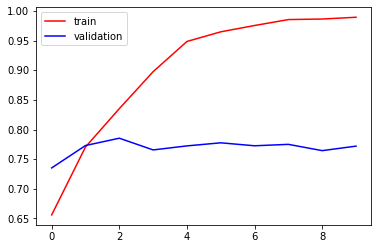

In [38]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label= 'validation')
plt.legend()
plt.show()   ###graph will explain "overfitting" mean training accuracy is more. testing accuracy is less.

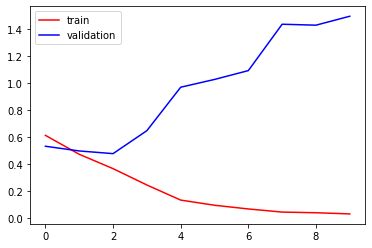

In [39]:
plt.plot(history.history['loss'],color = "red",label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [40]:
#ways to reduce overfitting
# Add more data
# Data Augmentation
# L1/L2 Regularzation
# Dropout
# Batch Norm
# Reduce Complexity
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization, Dropout

In [41]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape = (256,256,3))) # 1st convolution layer
model.add(BatchNormalization()) #Applying Batch Normalization
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid')) # 1st pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu')) # 2nd convolution layer
model.add(BatchNormalization()) #Applying Batch Normalization
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid')) # 2nd pooling layer

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu')) # 3rd convolution layer
model.add(BatchNormalization()) #Applying Batch Normalization
model.add(MaxPooling2D(pool_size=(2,2),strides = 2,padding = 'valid')) # 3rd pooling layer
# 2nd and 3rd Convolution layer m input_shape = (256,256,3) dyny ki zaurort nhi

model.add(Flatten()) #flatten layer
# 3 Fully Connected Layers lga rehy h
model.add(Dense(128,activation='relu'))  # 128  = neurons
model.add(Dropout(0.1)) # Applying Dropout
model.add(Dense(64,activation = 'relu'))  # 64 neurons
model.add(Dropout(0.1)) # Applying Dropout
model.add(Dense(1,activation = 'sigmoid'))  # output h so 1 neuron and activation "sigmoid" ho jaye ga.

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [43]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [44]:
from keras.utils.tf_utils import validate_axis
history = model.fit(train_dataset,epochs = 10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 73s 115ms/step - loss: 1.0453 - accuracy: 0.6154 - val_loss: 0.5632 - val_accuracy: 0.7126
Epoch 2/10
625/625 [==============================] - 71s 114ms/step - loss: 0.5383 - accuracy: 0.7332 - val_loss: 0.5703 - val_accuracy: 0.7160
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.4655 - accuracy: 0.7861 - val_loss: 0.6534 - val_accuracy: 0.6512
Epoch 4/10
625/625 [==============================] - 71s 113ms/step - loss: 0.4382 - accuracy: 0.8045 - val_loss: 0.5121 - val_accuracy: 0.7616
Epoch 5/10
625/625 [==============================] - 71s 113ms/step - loss: 0.3502 - accuracy: 0.8490 - val_loss: 0.5078 - val_accuracy: 0.7760
Epoch 6/10
625/625 [==============================] - 72s 114ms/step - loss: 0.2683 - accuracy: 0.8872 - val_loss: 0.8195 - val_accuracy: 0.7644
Epoch 7/10
625/625 [==============================] - 71s 113ms/step - loss: 0.2037 - accuracy: 0.9151 - val_loss: 0.5689 - val_ac

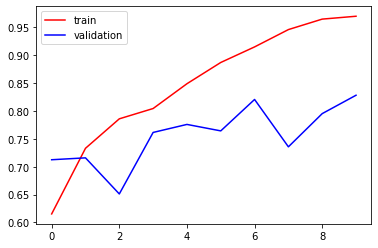

In [45]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label= 'validation')
plt.legend()
plt.show() 

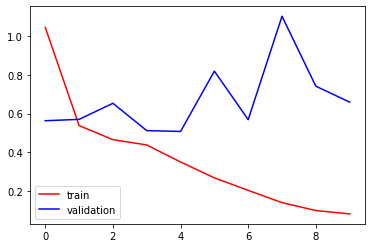

In [46]:
plt.plot(history.history['loss'],color = "red",label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

In [47]:
import cv2

In [52]:
test_img = cv2.imread('/content/dog.jpeg')

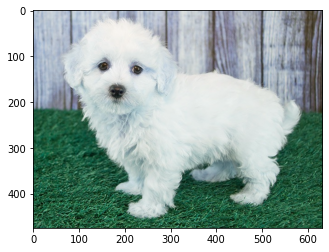

In [53]:
plt.imshow(test_img)

In [54]:
test_img1 = cv2.imread('/content/cat.jpeg')

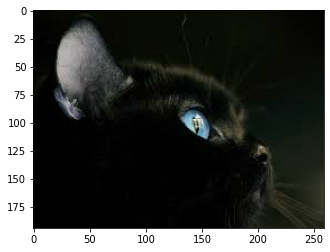

In [55]:
plt.imshow(test_img1)

In [56]:
test_img.shape

(475, 632, 3)

In [57]:
test_img1.shape

(194, 259, 3)

In [58]:
test_img = cv2.resize(test_img,(256,256))

In [59]:
test_img1 = cv2.resize(test_img1,(256,256))

In [60]:
test_input = test_img.reshape((1,256,256,3)) #batch m aik image  jis ka dimension ye h

In [61]:
test_input1 = test_img1.reshape((1,256,256,3))

In [62]:
model.predict(test_input)

1/1 [==============================] - 0s 255ms/step


array([[1.2870687e-18]], dtype=float32)

In [63]:
model.predict(test_input1)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)